# Data Exploration

By: David Rusho </br>

---


## Introduction

This notebook outlines the initial data exploration and preparation stages for a project aimed at answering the research question: 

"What factors contribute to positive airline customer satisfaction?" In the competitive airline industry, understanding these factors is crucial for enhancing services and fostering customer loyalty.


The analysis is based on a dataset from 'Invistico Airlines', sourced from Kaggle, which includes customer demographics, flight details, and satisfaction ratings. This notebook covers the data loading, exploratory analysis, cleaning, and preprocessing steps necessary to prepare the data for predictive modeling.


The analysis will be guided by the following hypotheses:


Null Hypothesis: There is no significant relationship between the predictor variable "Satisfaction" and the explanatory variables.


Alternative Hypothesis: There is a significant relationship between the predictor variable "Satisfaction" and the explanatory variables.

---

## Data Dictionary

| #  | Column                             | Datatype        | Description                                           |
|----|------------------------------------|-----------------|-------------------------------------------------------|
| 1  | Age                                | Quantitative    | Age of the customer.                                  |
| 2  | Arrival Delay in Minutes           | Quantitative    | Total arrival delay in minutes.                       |
| 3  | Baggage handling                   | Quantitative    | Rating of baggage handling satisfaction (1 to 5).     |
| 4  | Class                              | Qualitative     | Class of travel: 'Business', 'Eco', or 'Eco Plus’.    |
| 5  | Checkin service                    | Quantitative    | Rating of check-in service satisfaction (1 to 5).     |
| 6  | Cleanliness                        | Quantitative    | Rating of cleanliness satisfaction (1 to 5).          |
| 7  | Customer Type                      | Qualitative     | Type of customer: 'Loyal Customer' or 'Disloyal Customer’. |
| 8  | Departure Delay in Minutes         | Quantitative    | Total departure delay in minutes.                     |
| 9  | Departure/Arrival time convenient  | Quantitative    | Rating of the convenience of departure/arrival time (1 to 5). |
| 10 | Ease of Online booking             | Quantitative    | Rating of ease of online booking satisfaction (1 to 5). |
| 11 | Food and drink                     | Quantitative    | Rating of food and drink quality provided during the flight (1 to 5). |
| 12 | Gender                             | Qualitative     | Not provided in the data dictionary                   |
| 13 | Gate location                      | Quantitative    | Rating of gate location convenience (1 to 5).         |
| 14 | Flight Distance                    | Quantitative    | The distance of the flight in kilometres              |
| 15 | Inflight entertainment             | Quantitative    | Rating of inflight entertainment satisfaction (1 to 5). |
| 16 | Inflight wifi service              | Quantitative    | Rating of inflight wifi service satisfaction (1 to 5). |
| 17 | Leg room service                   | Quantitative    | Rating of leg room service satisfaction (1 to 5).     |
| 18 | Online boarding                    | Quantitative    | Rating of online boarding satisfaction (1 to 5).      |
| 19 | Online support                     | Quantitative    | Rating of online customer support satisfaction (1 to 5). |
| 20 | On-board service                   | Quantitative    | Rating of on-board service satisfaction (1 to 5).     |
| 21 | Seat comfort                       | Quantitative    | Rating of seat comfort provided during the flight (1 to 5). |
| 22 | Type of Travel                     | Qualitative     | Purpose of the travel: 'Business travel' or 'Personal Travel’. |

---

## Prerequisites 
#### Install Python Libraries


In [ ]:
# cell 1
!pip3 install matplotlib
!pip3 install statsmodels missingno
!pip3 install pandas
!pip3 install scipy
!pip3 install scikit-learn
!pip3 install jinja2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 43.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


#### Import Libaries


In [ ]:
# cell 2

# Standard Libraries
import warnings
import os

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Statistical Models
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

# Miscellaneous
warnings.filterwarnings('ignore')

## Data Loading

#### Load CSV into Pandas


In [ ]:
# cell 3

# Using Pandas for data manipulation, Matplotlib and Seaborn for visualization, and Missingno for identifying missing data

# Increase column display/print range to display all columns
pd.set_option("display.max_columns", None)

# Get the current working directory
cwd = os.getcwd()

# Specify the relative file path
relative_path = "../data/raw/Airline_customer_satisfaction.csv"

# Combine the current working directory with the relative file path
file_path = os.path.join(cwd, relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first 3 rows of the DataFrame
df.head(3)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0


## Initial Data Exploration

In [ ]:
# cell 4

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

Note that the "Arrival Delay in Minutes" column has missing values

In [ ]:
# cell 5

# Categorize variables based on their nature for easier data manipulation and analysis

# Survey-related columns, typically rated by customers
survey_columns = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
    'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service',
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

# Continuous variables representing numerical data
continuous_columns = [
    'Age', 'Flight Distance', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Categorical variables representing types or categories
categorical_columns = [
    'Customer Type', 'Type of Travel', 'Class'
]

In [ ]:
# cell 6

df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
# cell 7

# count nulls in each column
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Nulls are located in "Arrival Delay in Minutes" column

In [ ]:
# cell 8

# check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates found

In [ ]:
# cell 9

# Enhanced visualization for missing data in columns with formatted percentages

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()
               * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1,
                             keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total'] > 0]
    return missing_data.style.applymap(lambda x: "color: black; background-color: yellow").format({"Percent": "{:.2f}%"})


# Display the enhanced missing data visualization with formatted percentages
missing_data(df)

,Total,Percent
Arrival Delay in Minutes,393,0.30%


In [ ]:
# cell 10

df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Given the skewed nature of the Arrival Delay in Minutes column, as indicated by the summary statistics, the median is a more robust measure than the mean for imputation as it is less sensitive to outliers."

In [ ]:
# cell 11

# Create a copy of the dataframe for missing value imputation
df_imputed = df.copy()

# Impute missing values in 'Arrival Delay in Minutes' with the column's median
df_imputed['Arrival Delay in Minutes'].fillna(
    df_imputed['Arrival Delay in Minutes'].median(), inplace=True)

# Verify imputation by checking for remaining nulls in the column
null_count = df_imputed['Arrival Delay in Minutes'].isnull().sum()
print(f"Nulls Count for 'Arrival Delay in Minutes': {null_count}")

missing_data(df_imputed)

Nulls Count for 'Arrival Delay in Minutes': 0


,Total,Percent


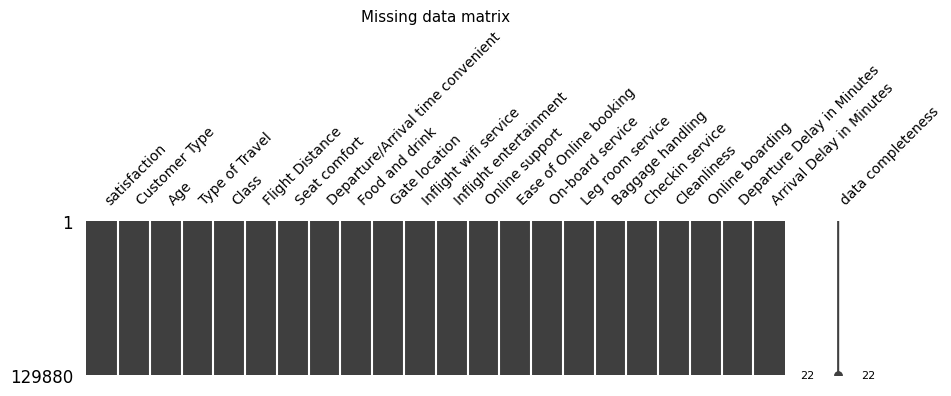

In [ ]:
# cell 12

# visualize missing values with missingno
msno.matrix(df_imputed, labels=True,
            figsize=(10, 2), fontsize=10)  # show headers
plt.title("Missing data matrix")
plt.show()

Visualize and identify outliers with boxplots in continuous variables.

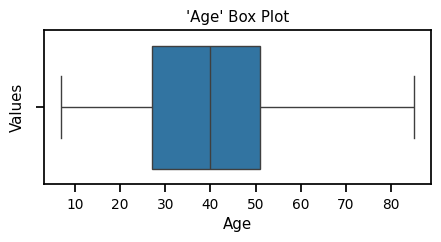

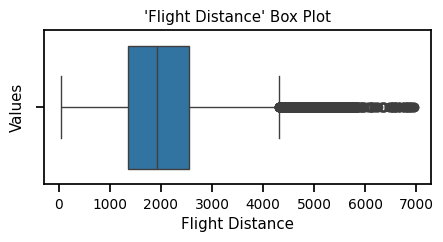

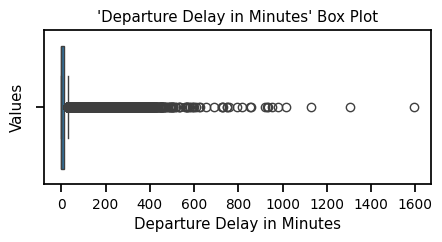

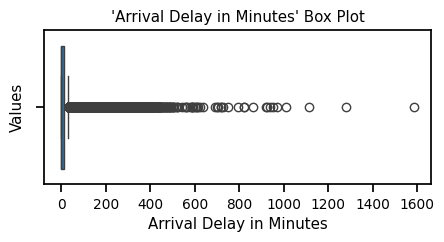

In [ ]:
# cell 13

# sns box plot per column
def plot_box(df, col: str):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(5, 2))
    # Create a box plot
    sns.set_context('notebook', font_scale=.9)
    sns.boxplot(data=df[col], orient="h")

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel("Values")
    plt.title(f"'{col}' Box Plot")

    # Show the plot
    plt.show()


# Plot box plots for continuous columns
for col in continuous_columns:
    plot_box(df_imputed, col)

In [ ]:
# cell 14

# Create a list of columns for outlier analysis, excluding 'Age'
outlier_columns = [col for col in continuous_columns if col != 'Age']

# iqr method to detect outliers


def iqr_outliers(df, col: str):
    # Calculate the first quartile
    Q1 = df[col].quantile(0.25)
    # Calculate the third quartile
    Q3 = df[col].quantile(0.75)
    # Calculate the interquartile range
    IQR = Q3 - Q1
    # Calculate the lower bound
    lower_bound = Q1 - 1.5 * IQR
    # Calculate the upper bound
    upper_bound = Q3 + 1.5 * IQR

    # Return the number of outliers
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]


# Detect outliers in each column and format the output with commas
for col in outlier_columns:
    num_outliers = iqr_outliers(df_imputed, col)
    print(f"{col}: {num_outliers:,}")

Flight Distance: 2,581
Departure Delay in Minutes: 18,098
Arrival Delay in Minutes: 17,492


Capping outliers using the IQR method, which is a standard technique to reduce the influence of extreme values without removing them entirely

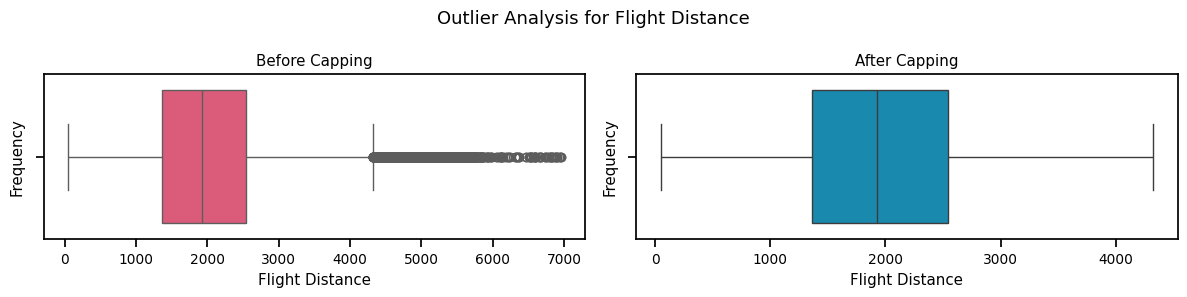

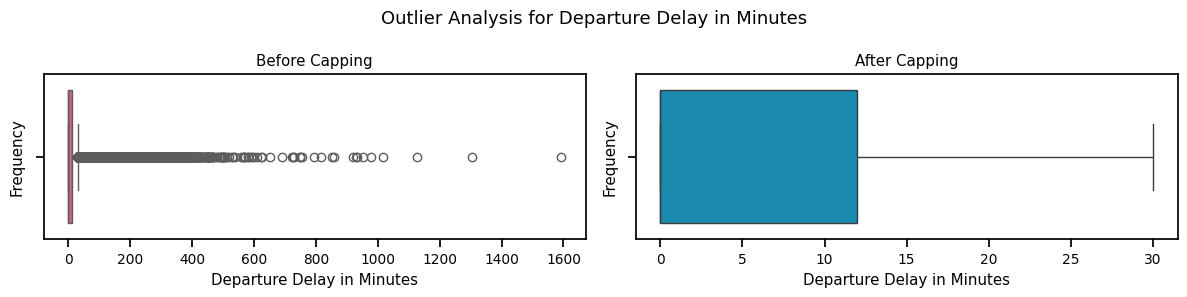

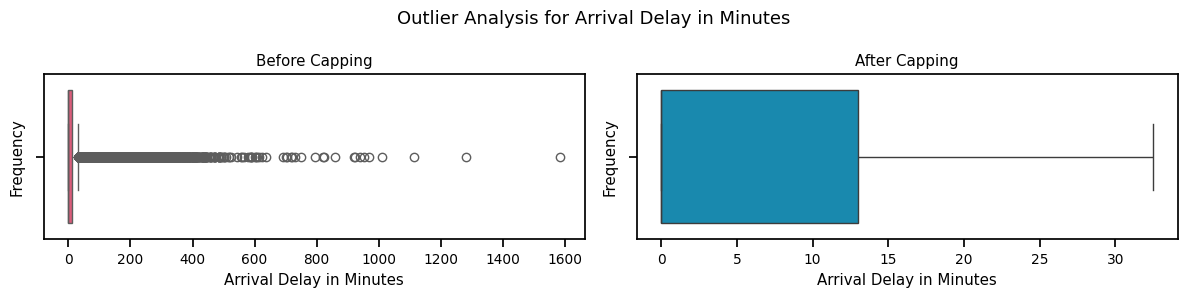

In [ ]:
# cell 15

# Copy the df to apply outlier capping
df_capped = df_imputed.copy()


def calculate_iqr_bounds(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


def cap_outliers(original_df, col):
    lower_bound, upper_bound = calculate_iqr_bounds(original_df, col)

    # Apply capping
    original_df[col] = np.clip(
        original_df[col], lower_bound, upper_bound)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    sns.set_context('notebook', font_scale=.9)
    sns.boxplot(x=df[col], ax=axes[0], color="#ef476f").set(
        title="Before Capping", xlabel=col, ylabel="Frequency")
    sns.boxplot(x=original_df[col], ax=axes[1], color="#0096c7").set(
        title="After Capping", xlabel=col, ylabel="Frequency")
    plt.suptitle(f"Outlier Analysis for {col}")
    plt.tight_layout()
    plt.show()


# Apply outlier capping to each specified col
for col in outlier_columns:
    cap_outliers(df_capped, col)

logistic regression requires the target variable (satisfaction) to be in a binary format.

In [ ]:
# cell 16

# Copy the dataframe for data wrangling
df_wrangled = df_imputed.copy()

# Specify the target variable
dependent_var = 'satisfaction'

# Map 'satisfaction' to binary values: 0 for 'dissatisfied', 1 for 'satisfied'
df_wrangled[dependent_var] = df_wrangled[dependent_var].map(
    {'dissatisfied': 0, 'satisfied': 1})

# Display value counts of the target variable before and after mapping

print("Before Mapping (Original Data):")
print(df_capped[dependent_var].value_counts())

print("\nAfter Mapping:")
print(df_wrangled[dependent_var].value_counts())

Before Mapping (Original Data):
satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

After Mapping:
satisfaction
1    71087
0    58793
Name: count, dtype: int64


In [ ]:
# cell 17

# cardinality of categorical columns
for col in categorical_columns:
    print(f"\n{col}: {df_wrangled[col].nunique()} unique values")
    print(df_wrangled[col].value_counts())


Customer Type: 2 unique values
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Type of Travel: 2 unique values
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Class: 3 unique values
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


One-hot encoding used to convert categorical variables with low cardinality into a machine-readable format

In [ ]:
# cell 18

# Create a copy of the dataframe for encoding operations
encoded_df = (
    pd.get_dummies(
        df_wrangled,
        columns=categorical_columns,
        drop_first=True,  # avoid multicollinearity
        prefix_sep='_dummy_')
)

# Get the dummy columns from the encoded DataFrame
dummy_columns = [col for col in encoded_df.columns if 'dummy' in col]

# Convert dummy columns to integer type
encoded_df[dummy_columns] = encoded_df[dummy_columns].astype(int)

# Column names of both the original and the encoded DataFrames for comparison
print("Original DataFrame Columns:", df_wrangled.columns,
      '\nEncoded DataFrame Columns:', encoded_df.columns, sep='\n')

Original DataFrame Columns:
Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Encoded DataFrame Columns:
Index(['satisfaction', 'Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minu

In [ ]:
# cell 19

# Output the information of the encoded DataFrame
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   satisfaction                           129880 non-null  int64  
 1   Age                                    129880 non-null  int64  
 2   Flight Distance                        129880 non-null  int64  
 3   Seat comfort                           129880 non-null  int64  
 4   Departure/Arrival time convenient      129880 non-null  int64  
 5   Food and drink                         129880 non-null  int64  
 6   Gate location                          129880 non-null  int64  
 7   Inflight wifi service                  129880 non-null  int64  
 8   Inflight entertainment                 129880 non-null  int64  
 9   Online support                         129880 non-null  int64  
 10  Ease of Online booking                 129880 non-null  

In [ ]:
# cell 20

# Display the first few rows of the encoded DataFrame for verification
encoded_df.head()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_dummy_disloyal Customer,Type of Travel_dummy_Personal Travel,Class_dummy_Eco,Class_dummy_Eco Plus
0,1,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,0,1,1,0
1,1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,0,0
2,1,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,0,1,1,0
3,1,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,0,1,1,0
4,1,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,0,1,1,0


 Variance Inflation Factor (VIF) used to detect multicollinearity, which can destabilize a regression model.

In [ ]:
# cell 21

# Drop the target variable to focus on predictors for multicollinearity analysis
X = encoded_df.drop(columns=[dependent_var])

# Compute VIF for each predictor, rounding to 2 decimal places for readability
vif_data = (
    pd.DataFrame({
        "Feature": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]})
    .sort_values(by="VIF", ascending=False)
    .reset_index(drop=True)
    .assign(VIF=lambda df: df.VIF.round(2))
)

# Function to highlight cells with VIF >= 10 in yellow with black font


def highlight_vif(row):
    return (
        ['background-color: yellow; color: black'
         if v > 10 else '' for v in row]
    )


# Apply highlighting to the VIF column to visually identify multicollinearity concerns
vif_data_styled = (
    vif_data
    .style
    .apply(highlight_vif, subset=['VIF'])
    .set_caption("VIF Analysis (Values > 10 are highlighted)")
)
vif_data_styled

,Feature,VIF
0,Ease of Online booking,30.210000
1,Cleanliness,22.690000
2,Baggage handling,21.290000
3,Online boarding,20.680000
4,Online support,19.210000
5,On-board service,15.030000
6,Arrival Delay in Minutes,14.500000
7,Departure Delay in Minutes,14.460000
8,Inflight wifi service,13.860000
9,Inflight entertainment,13.650000


A common threshold for VIF is 10, remove features exceeding this value

In [ ]:
# cell 22

# create a copy of the VIF data
vif_data_filtered = vif_data.copy()

# filtering features with VIF greater than 10
vif_data_filtered = vif_data_filtered.query(
    "`VIF` < 10").reset_index(drop=True)

# VIF dataframe with features and their VIF values
vif_data_filtered.style.set_caption("Filtered VIF Analysis (VIF < 10)")

,Feature,VIF
0,Checkin service,9.650000
1,Departure/Arrival time convenient,8.900000
2,Age,7.320000
3,Flight Distance,4.460000
4,Class_dummy_Eco,3.190000
5,Type of Travel_dummy_Personal Travel,2.870000
6,Customer Type_dummy_disloyal Customer,1.780000
7,Class_dummy_Eco Plus,1.260000


In [ ]:
# cell 23

# Generate summary statistics for predictors with VIF < 10, ensuring readability by sorting features
features_with_low_vif = sorted(vif_data_filtered['Feature'].to_list())
summary_statistics = encoded_df[features_with_low_vif].describe()
summary_statistics

,Age,Checkin service,Class_dummy_Eco,Class_dummy_Eco Plus,Customer Type_dummy_disloyal Customer,Departure/Arrival time convenient,Flight Distance,Type of Travel_dummy_Personal Travel
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,3.340807,0.448945,0.072459,0.183092,2.990645,1981.409055,0.309416
std,15.119360,1.260582,0.497388,0.259248,0.386743,1.527224,1027.115606,0.462255
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000
25%,27.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1359.000000,0.000000
50%,40.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1925.000000,0.000000
75%,51.000000,4.000000,1.000000,0.000000,0.000000,4.000000,2544.000000,1.000000
max,85.000000,5.000000,1.000000,1.000000,1.000000,5.000000,6951.000000,1.000000


In [ ]:
# cell 24

# export encoded_df[features_with_low_vif] to csv
encoded_df[features_with_low_vif].to_csv('cleanded_data.csv', index=False)

In [ ]:
# cell 25

# Print the summary of the logistic regression model
def print_logit_model(df, independent_vars, dependent_var):
    X_with_constant = sm.add_constant(df[independent_vars])
    logit_model = sm.Logit(df[dependent_var], X_with_constant)
    result = logit_model.fit()
    print(result.summary())
    return result


# Identify the high p-value variables over 0.05
def print_high_pvals(result):
    return (
        result.pvalues[result.pvalues >= 0.05]
        .to_frame()
        .rename(columns={"index": "Feature", 0: "P-Value"})
        .sort_values("P-Value", ascending=False)
        .reset_index()
    )

In [ ]:
# cell 26

# Initialize DataFrame for Backward Elimination process
df_elimination = encoded_df.copy()

# Initialize list of predictors based on VIF analysis
predictors = vif_data_filtered['Feature'].tolist()

# Run the Backward Stepwise Elimination
while True:
    # Print the summary of the logistic regression model
    model_result = print_logit_model(df_elimination,
                                     predictors,
                                     dependent_var)

    # Get the DataFrame of high p-values
    high_pval_predictors = print_high_pvals(model_result)

    # If the DataFrame is empty or all p-values are below 0.05, break the loop
    if high_pval_predictors.empty or high_pval_predictors["P-Value"].min() < 0.05:
        break

    # Identify the highest p-value variable
    highest_pval_var = high_pval_predictors["index"].loc[0]
    highest_pval_val = high_pval_predictors["P-Value"].loc[0]

    # Remove highest p-value column
    predictors.remove(highest_pval_var)
    print("\nRemoved Highest P-Value: ",
          highest_pval_var, ":", highest_pval_val, "\n")

Optimization terminated successfully.
         Current function value: 0.559671
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:               129880
Model:                          Logit   Df Residuals:                   129871
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Jul 2025   Pseudo R-squ.:                  0.1873
Time:                        20:15:12   Log-Likelihood:                -72690.
converged:                       True   LL-Null:                       -89443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.7038      

In [ ]:
# Export cleaned dataset

df_elimination[predictors + [dependent_var]
               ].to_csv('../data/processed/final_airline_data.csv', index=False)